We use TensorFlow to implement various machine learning/ deep learning models.There are many situations in practical where we may be required to implement customised models or use existing TensorFlow functionality and extend it. TensorFlow 2.0 provides this support to to suit our needs.

The most obvious difference between NumPy arrays and Tensors are that tensors are backed up by accelerator memory (such as GPU, TPU) and tensors are immutable.

Converting between a TensorFlow tensors and NumPy array is easy. TensorFlow operations automatically convert NumPy arrays to tensors; and NumPy operations automatically convert tensors to NumPy array. Tensors are explicitly converted to NumPy array using `.numpy()` method.These conversions are cheap, because the NumPy array and tensor share the same underlying memory representation. However, sharing the underlying representation is not always possible as tensors also reside in the accelerator's memory. If the tensor is hosted in the GPU, then we first need to copy it to memory, a carry out the conversion to  NumPy. 

Many TensorFlow operations can be accelerated using GPUs without any annotations.TensorFlow automatically decides whether to use GPU or CPU for any operation. When it decides to use a GPU, it copies the data to GPU and use it for performing thedesired operation.Tensors produced by the operation are typically backed by memory of the device on which the operation was executed.

### DEVICE NAMES:
We can check if there's a GPI using `tf.test.is_gpu_available()` method.

We can check if the tensor is stored on the GPU using `tensor.device.endswith()` method, where we can see if the tensor is stored on GPU. 

How are device names specified in TensorFlow?
The 'tensor.device` property provides a complete, qualified string name of the device hosting the contents in consideration. 
For instance: 
 `/job:localhost/replica:0/task:0/device:GPU:0 ` 
There are two parts to it:
- The name encodes many details such as the identifier of the network address of the host where the program is being executed 
- The device within that host.

One device may have multiple GPUs and could be multiple such devices. So, there could be device number 1,2,etc. with each device consisting of multiple GPUs. 
To understand where the tensor is stored,we need the device identifier: there are two things that we need to know-
- device ID
- GPU ID within the device.

Say, we have a string that will have things like, `device:1 GPU:N` where 'N' is GPU ID. The GPUs on this first device are say 0, 1 and 2. So, this particular GPU gets identified as device:1 GPU:0. This particular path gives us a complete identification of the device where the tensor is stored.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# add two scalars
print(tf.add(1,2))

#add two vectors
print(tf.add([1,2], [3,4]))

#square the numbers
print(tf.square(5))

#sum elements in a list and return scalar
print(tf.reduce_sum([1,2,3]))

#Operator overloading
print(tf.square(2)+tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [3]:
x = tf.matmul([[1]], [[2,3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [4]:
ndarray = np.ones([3,3])
print(ndarray)
tensor = tf.multiply((ndarray), 42)
print(tensor)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)


In [5]:
print(np.add(tensor, 1))


[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]


In [6]:
print(tensor.numpy())

[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [7]:
x = tf.random.uniform([3,3])

print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [8]:
x.device.endswith(':GPU:0')

True

In [9]:
x.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [10]:
import time

def time_mul(x):
    start = time.time()

    for i in range(100):
        tf.matmul(x,x)

    result = time.time() - start
    print(result)

# ON CPU
with tf.device('CPU:0'):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith('CPU:0')
    time_mul(x)

# ON GPU
if tf.test.is_gpu_available():
    with tf.device('GPU:0'):
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith('GPU:0')
        time_mul(x)

2.981656551361084
1.4293291568756104


In [11]:
layer = tf.keras.layers.Dense(100)

In [12]:
layer1 = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [13]:
layer1(tf.zeros([10,5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
layer1.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.17408803, -0.09986854, -0.2953311 ,  0.23820466,  0.53822297,
         -0.05619758,  0.41361254,  0.29477376,  0.00955433, -0.1534527 ],
        [ 0.44852215,  0.15761554,  0.38537806, -0.28430238,  0.19891518,
          0.12278503, -0.14534625, -0.3537402 , -0.31939253,  0.5657993 ],
        [-0.6000447 ,  0.07587904,  0.5022448 ,  0.00851643, -0.33499107,
          0.60952014, -0.08725792,  0.5120377 ,  0.6167646 ,  0.05064207],
        [ 0.27519846,  0.00323021, -0.0963015 ,  0.12160826,  0.01130348,
         -0.32471675, -0.20411137, -0.03770316,  0.5537006 ,  0.25912178],
        [-0.59491324,  0.57183844,  0.28022158, -0.0865863 ,  0.2229535 ,
          0.49933726, -0.2124916 , -0.45860696, -0.12325746,  0.23645335]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [15]:
layer1.kernel, layer1.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.17408803, -0.09986854, -0.2953311 ,  0.23820466,  0.53822297,
         -0.05619758,  0.41361254,  0.29477376,  0.00955433, -0.1534527 ],
        [ 0.44852215,  0.15761554,  0.38537806, -0.28430238,  0.19891518,
          0.12278503, -0.14534625, -0.3537402 , -0.31939253,  0.5657993 ],
        [-0.6000447 ,  0.07587904,  0.5022448 ,  0.00851643, -0.33499107,
          0.60952014, -0.08725792,  0.5120377 ,  0.6167646 ,  0.05064207],
        [ 0.27519846,  0.00323021, -0.0963015 ,  0.12160826,  0.01130348,
         -0.32471675, -0.20411137, -0.03770316,  0.5537006 ,  0.25912178],
        [-0.59491324,  0.57183844,  0.28022158, -0.0865863 ,  0.2229535 ,
          0.49933726, -0.2124916 , -0.45860696, -0.12325746,  0.23645335]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [16]:
class MyDenseLayers(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayers, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                     shape=[int(input_shape[-1]), self.num_outputs])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)

layer = MyDenseLayers(10)
print(layer(tf.zeros([10,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layers/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.62272483,  0.29697108, -0.4457891 ,  0.61858433, -0.23507696,
         0.11428493,  0.346076  , -0.437034  ,  0.40389568, -0.26198226],
       [ 0.44185835,  0.35615796,  0.5217629 ,  0.27853256,  0.3567525 ,
         0.24940556,  0.5157029 , -0.39999402, -0.38234535,  0.19947791],
       [ 0.512896  , -0.25740144,  0.38509244, -0.01314521,  0.58289546,
         0.23847318, -0.55891895, -0.20240426,  0.34692013, -0.1218251 ],
       [ 0.36787218, -0.14462203, -0.06968331, -0.35505053,  0.04238367,
         0.6088534 ,  0.51654047, -

In [17]:
layer.kernel

<tf.Variable 'my_dense_layers/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.62272483,  0.29697108, -0.4457891 ,  0.61858433, -0.23507696,
         0.11428493,  0.346076  , -0.437034  ,  0.40389568, -0.26198226],
       [ 0.44185835,  0.35615796,  0.5217629 ,  0.27853256,  0.3567525 ,
         0.24940556,  0.5157029 , -0.39999402, -0.38234535,  0.19947791],
       [ 0.512896  , -0.25740144,  0.38509244, -0.01314521,  0.58289546,
         0.23847318, -0.55891895, -0.20240426,  0.34692013, -0.1218251 ],
       [ 0.36787218, -0.14462203, -0.06968331, -0.35505053,  0.04238367,
         0.6088534 ,  0.51654047, -0.4284609 ,  0.0043596 , -0.03019053],
       [-0.09145874,  0.23880416, -0.0412274 ,  0.34513628, -0.6141051 ,
         0.26503575, -0.4839522 , -0.24712396, -0.4089572 ,  0.5302164 ]],
      dtype=float32)>

In [18]:
layer.variables

[<tf.Variable 'my_dense_layers/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.62272483,  0.29697108, -0.4457891 ,  0.61858433, -0.23507696,
          0.11428493,  0.346076  , -0.437034  ,  0.40389568, -0.26198226],
        [ 0.44185835,  0.35615796,  0.5217629 ,  0.27853256,  0.3567525 ,
          0.24940556,  0.5157029 , -0.39999402, -0.38234535,  0.19947791],
        [ 0.512896  , -0.25740144,  0.38509244, -0.01314521,  0.58289546,
          0.23847318, -0.55891895, -0.20240426,  0.34692013, -0.1218251 ],
        [ 0.36787218, -0.14462203, -0.06968331, -0.35505053,  0.04238367,
          0.6088534 ,  0.51654047, -0.4284609 ,  0.0043596 , -0.03019053],
        [-0.09145874,  0.23880416, -0.0412274 ,  0.34513628, -0.6141051 ,
          0.26503575, -0.4839522 , -0.24712396, -0.4089572 ,  0.5302164 ]],
       dtype=float32)>]

## GRADIENT TAPE

In [19]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y = x ** 2
    z = y ** 2

dz_dx, dz_dy = tape.gradient(z, [x,y])
print(dz_dx)
print(dz_dy)

tf.Tensor(32.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [20]:
print(dz_dx.numpy())
print(dz_dy.numpy())

32.0
8.0


In [21]:
x = tf.constant(2.0)
with tf.GradientTape() as tape:
    tape.watch(x) # since 'x' is not a variable, we must explicitly "watch" it
    y = x ** 2

dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

4.0


In [22]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x) # since 'x' is not a variable, we must explicitly "watch" it
    y = x * x
    z = y * y

dz_dx = t.gradient(z,x)
dy_dx = t.gradient(y,x)
dz_dy = t.gradient(z,y)

In [23]:
print(dz_dx)
print(dz_dy)
print(dy_dx)

del t

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [24]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i>1 and i<5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as tape:
        tape.watch(x)
        out = f(x,y)
    return tape.gradient(out, x)

x = tf.convert_to_tensor(2.0)

In [25]:
print(grad(x,6))
print(grad(x,5))
print(grad(x,4))

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [26]:
assert grad(x,6).numpy() == 12.0

In [27]:
x = tf.Variable(3.0)
with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
        dy_dx = t2.gradient(y,x)
    d2y_dx2 = t.gradient(dy_dx, x)
print(dy_dx)
print(d2y_dx2)

tf.Tensor(27.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)


In [28]:
v = tf.Variable(3.0)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [29]:
assert v.numpy() == 3.0

In [30]:
v.assign(5.0)
assert v.numpy() == 5.0

In [31]:
v.assign(tf.square(v))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=25.0>

In [33]:
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=25.0>


In [34]:
assert v.numpy() == 25.0

In [35]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self,x):
        return self.W*x + self.b

model = Model()
print(model(3.0).numpy())

15.0


In [36]:
assert model(3.0).numpy() == 15.0

In [37]:
def loss(predicted, target):
    return tf.reduce_mean(tf.square(predicted-target))

In [38]:
W = 3.0
b = 2.0
num = 1000

inputs = tf.random.normal(shape=[num])
noise = tf.random.normal(shape=[num])
outputs = inputs * W + b + noise

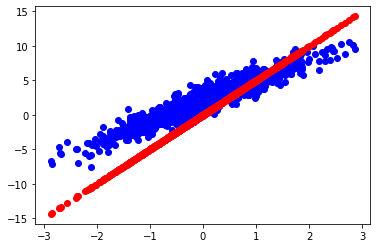

Loss: 8.522434


In [39]:
import matplotlib.pyplot as plt
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [40]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00 loss=8.52243
Epoch  1: W=4.64 b=0.39 loss=5.95948
Epoch  2: W=4.34 b=0.71 loss=4.26253
Epoch  3: W=4.10 b=0.96 loss=3.13871
Epoch  4: W=3.90 b=1.17 loss=2.39427
Epoch  5: W=3.74 b=1.33 loss=1.90104
Epoch  6: W=3.60 b=1.47 loss=1.57418
Epoch  7: W=3.49 b=1.58 loss=1.35753
Epoch  8: W=3.40 b=1.66 loss=1.21390
Epoch  9: W=3.33 b=1.74 loss=1.11866


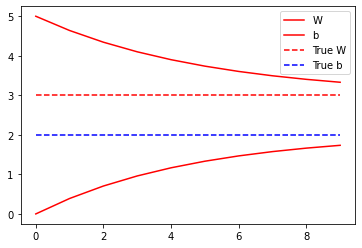

In [42]:
model = Model()

Ws, bs = [], []

epochs = range(10)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))
    
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'r')
plt.plot([W]*len(epochs), 'r--',
         [b]*len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

In [43]:
from tensorflow import keras

In [48]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
        tf.keras.layers.Dense(64, bias_initializer=tf.keras.initializers.Constant(2.0), bias_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(128,kernel_initializer='orthogonal', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [49]:
data = np.random.random((1000,32))
print('Data shape:', data.shape)
print(data)
print()

labels = np.random.random((1000,10))
print('Labels shape: ', labels.shape)
print(labels)
print()

Data shape: (1000, 32)
[[0.97954465 0.18302587 0.84226344 ... 0.86850893 0.20626747 0.89494828]
 [0.43280735 0.73770073 0.27910187 ... 0.87665732 0.30208203 0.22368946]
 [0.81794942 0.3990995  0.0093384  ... 0.02957062 0.64931062 0.43156276]
 ...
 [0.03920569 0.70401476 0.75534263 ... 0.15885504 0.11648997 0.92837774]
 [0.9545672  0.031446   0.43361966 ... 0.41616207 0.94686034 0.34282461]
 [0.35822306 0.19707344 0.56004384 ... 0.56408308 0.07472525 0.82350524]]

Labels shape:  (1000, 10)
[[0.0390684  0.42187394 0.34374849 ... 0.27354736 0.97785194 0.1562255 ]
 [0.23882722 0.14178454 0.69682606 ... 0.00501256 0.96540568 0.68259575]
 [0.88198011 0.88342538 0.39664028 ... 0.02738053 0.62319968 0.24966241]
 ...
 [0.60852563 0.52975382 0.39051954 ... 0.58788028 0.21045514 0.47548523]
 [0.60779037 0.84527735 0.68774207 ... 0.50403993 0.15632155 0.68025155]
 [0.63273588 0.83383532 0.63927639 ... 0.35606014 0.71477337 0.21674715]]



In [50]:
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 24.9986 - accuracy: 0.0953
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 47.8620 - accuracy: 0.0975
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 136.8667 - accuracy: 0.1177
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 253.2274 - accuracy: 0.1153
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 278.2187 - accuracy: 0.1040
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 820.0226 - accuracy: 0.1076
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 1858.4337 - accuracy: 0.1032
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3537.5663 - accuracy: 0.0939
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 4240.5401 - accuracy: 0.1142
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 8401.6007 - accuracy: 0.09

In [51]:
val_data = np.random.random((100,32))
val_labels = np.random.random((100,10))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))

Epoch 1/10
32/32 [==============================] - 0s 13ms/step - loss: 11814.5312 - accuracy: 0.1000 - val_loss: 13747.5488 - val_accuracy: 0.1000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 13629.3379 - accuracy: 0.0960 - val_loss: 13913.0088 - val_accuracy: 0.0900
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 18813.5645 - accuracy: 0.1100 - val_loss: 26283.7168 - val_accuracy: 0.0500
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 32925.1875 - accuracy: 0.0880 - val_loss: 27630.1172 - val_accuracy: 0.0500
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 30097.1465 - accuracy: 0.0960 - val_loss: 37599.8633 - val_accuracy: 0.0900
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 50333.9141 - accuracy: 0.0870 - val_loss: 80697.7031 - val_accuracy: 0.0500
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 69104.8125 - accuracy: 0.1070 - val_los